[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PyMPDATA/blob/main/examples/PyMPDATA_examples/Arabas_and_Farhat_2020/fig_1.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PyMPDATA.git/main?urlpath=lab/tree/examples/PyMPDATA_examples/Arabas_and_Farhat_2020/fig_1.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PyMPDATA/blob/main/examples/PyMPDATA_examples/Arabas_and_Farhat_2020/fig_1.ipynb)

license: GPL v3   
authors: Sylwester Arabas, Michael Olesik, Piotr Bartman   
copyright: Jagiellonian University   
based on Fig. 1 from [Arabas & Farhat 2020](https://doi.org/10.1016/j.cam.2019.05.023)

In [1]:
import sys

import matplotlib.pyplot as plt

if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PyMPDATA-examples')


KeyboardInterrupt



In [1]:
import os
os.environ["NUMBA_DISABLE_JIT"] = "1"

In [1]:
import numpy as np
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot, show_anim
from PyMPDATA_examples.asian_option.simulation import Simulation
from PyMPDATA_examples.asian_option.setup3_asian_option import Settings
# from PyMPDATA_examples.asian_option.setup1_european_corridor import Settings
from PyMPDATA_examples.asian_option.colors import colors

In [2]:
# vel_a = 0.1
# vel_x = 2
# x_steps = 21
# a_steps = 20
# A = np.linspace(0, 10, a_steps)
# X = np.linspace(0, 10, x_steps)
# X, A = np.meshgrid(X, A)
# fig, ax = pyplot.subplots()
# # ax.quiver(X, A, vel_x, vel_a, color='red', label='vector-field values at cell centers')
# ax.quiver(X, A, vel_x, 0, color='green', label='vector-field x-component values at cell walls')
# ax.quiver(X, A, 0, vel_a, color='blue', label='vector-field a-component values at cell walls')
# ax.set_xlabel("underlying asset price")
# ax.set_ylabel("time-to-maturity")
# ax.set_title("vector-field values at cell walls")
# # ax.legend()
# show_plot()


In [3]:
settings = Settings()
simulation = Simulation(settings)

self.nt=92, self.dt=0.005434782608695652
self.S.shape=(75,), self.A.shape=(75,)
self.S_mesh.shape=(75, 75), self.A_mesh.shape=(75, 75)
cond.shape=(75, 75)
36, 38
advectee.shape=(75, 75)
np.max(np.abs(a_dim_advector))=0.8043585123750683
np.max(np.abs(a_dim_advector))=0.8043585123750683
x_dim_advector.shape=(75, 76) a_dim_advector.shape=(76, 75)


In [4]:
simulation.solver.advectee.get()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

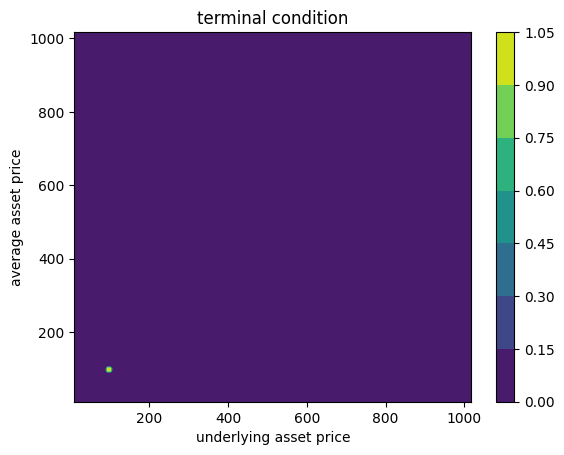

In [5]:
#do a 2d plot of the initial condition using the meshgrid and contourplot
fig, ax = pyplot.subplots()
CS = ax.contourf(simulation.S_mesh, simulation.A_mesh, simulation.solver.advectee.get())
fig.colorbar(CS, ax=ax)
ax.set_title("terminal condition")
ax.set_xlabel("underlying asset price")
ax.set_ylabel("average asset price")
pyplot.show()

In [6]:
# check for nan
advector = simulation.solver.advector

A.shape=(76, 75)
X.shape=(75, 76)
a_vals.shape=(75, 75)
x_vals.shape=(75, 75)


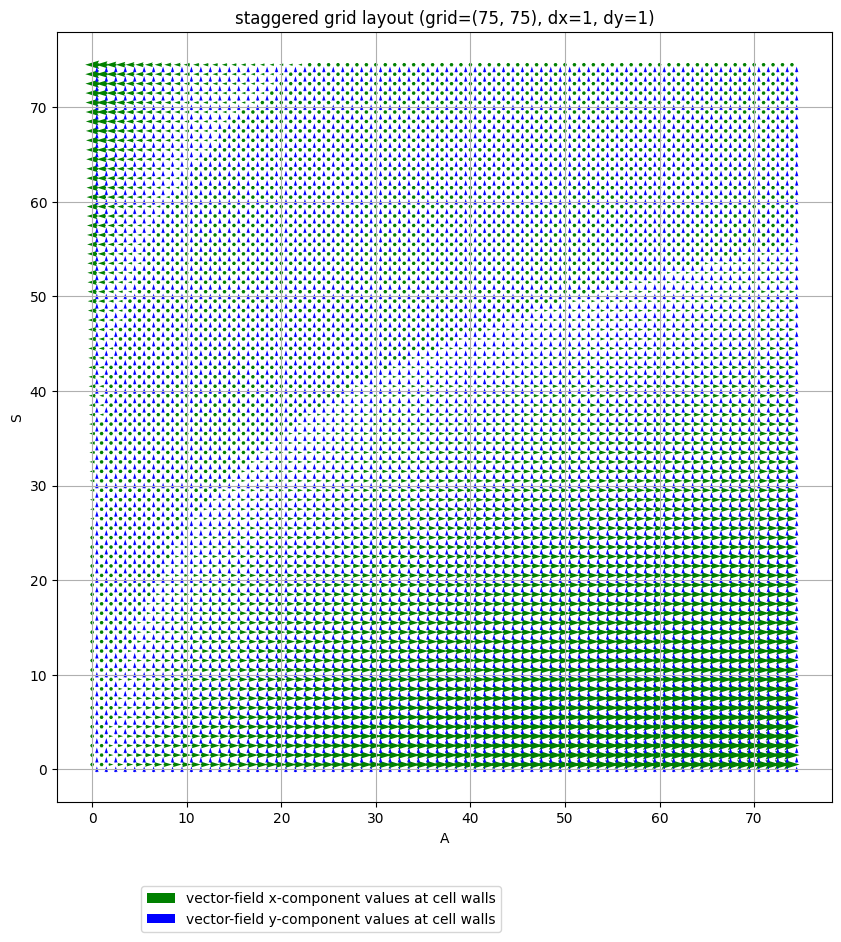

In [7]:
# do a contour plot of advector
A = advector.get_component(0)
X = advector.get_component(1)
print(f"{A.shape=}")
print(f"{X.shape=}")
# fig, ax = pyplot.subplots()
a_vals = (A[1:, :] + A[0:-1, :])/2
x_vals = (X[:, 1:] + X[:, 0:-1])/2

print(f"{a_vals.shape=}")
print(f"{x_vals.shape=}")

# do a quiver plot based on the cell above
dx, dy = 1, 1
grid = (A.shape[0]-1, A.shape[1])
# grid = (15, 40)
# fig, ax = pyplot.subplots()
# make bigger plot
fig, ax = pyplot.subplots(figsize=(10, 10))
ax.quiver(*np.mgrid[
        0 : (grid[0]) * dx : dx,
        dy / 2 : grid[1] * dy : dy
    ], a_vals.flatten(), 0, pivot='mid', color='green', width=.005,
    label='vector-field x-component values at cell walls'
)
ax.quiver(*np.mgrid[
        dx / 2 : grid[0] * dx : dx,
        0: (grid[1]) * dy : dy
    ], 0, x_vals.flatten(), pivot='mid', color='blue', width=.005,
    label='vector-field y-component values at cell walls'
)
# set ax axes to equal aspect ratio
ax.axis('equal')
# pyplot.xticks(np.linspace(0, grid[0]*dx, grid[0]+1))
# pyplot.yticks(np.linspace(0, grid[1]*dy, grid[1]+1))
pyplot.title(f'staggered grid layout (grid={grid}, dx={dx}, dy={dy})')
pyplot.xlabel('A')
pyplot.ylabel('S')
pyplot.legend(bbox_to_anchor=(.1, -.1), loc='upper left', ncol=1)
# set equal aspect ratio
# ax.axis('equal')
pyplot.grid()
pyplot.show()
# pyplot.savefig('readme_grid.png')






In [8]:
simulation.solver.advectee.get()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
# res = simulation.run(n_iters=2)

In [10]:
# #do a 2d plot of the initial condition using the meshgrid and contourplot
# fig, ax = pyplot.subplots()
# CS = ax.contourf(simulation.S_mesh, simulation.A_mesh, simulation.solver.advectee.get())
# fig.colorbar(CS, ax=ax)
# ax.set_title("terminal condition")
# ax.set_xlabel("underlying asset price")
# ax.set_ylabel("average asset price")
# pyplot.show()

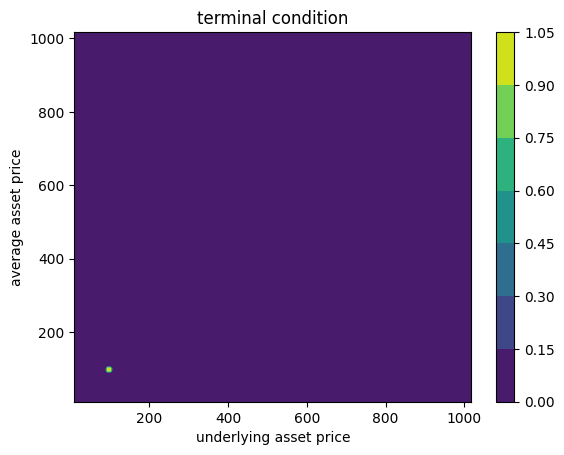

iteration 0


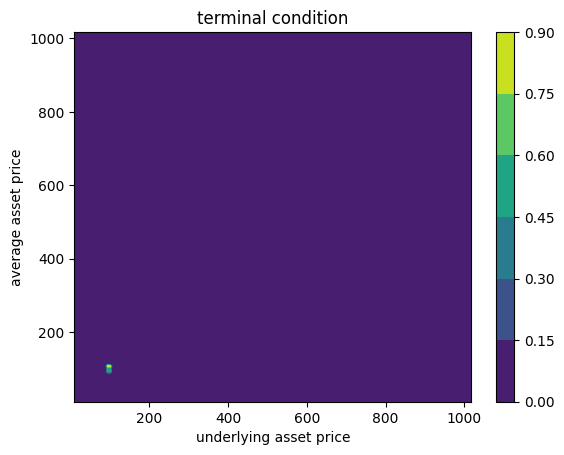

iteration 1


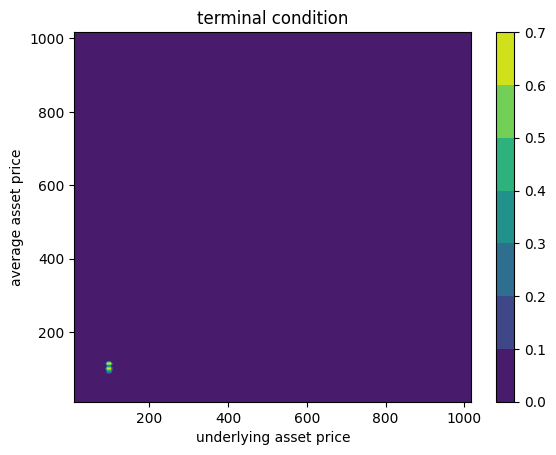

iteration 2


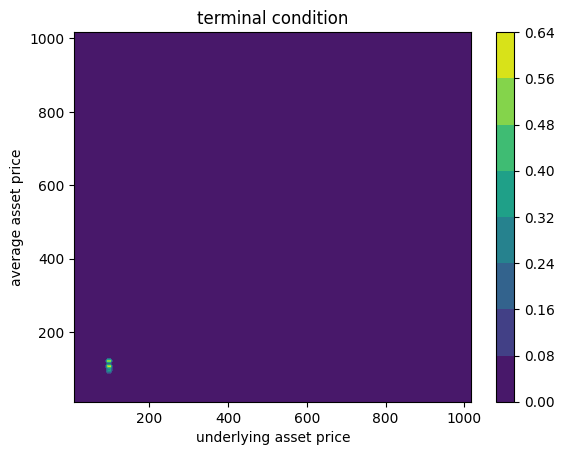

iteration 3


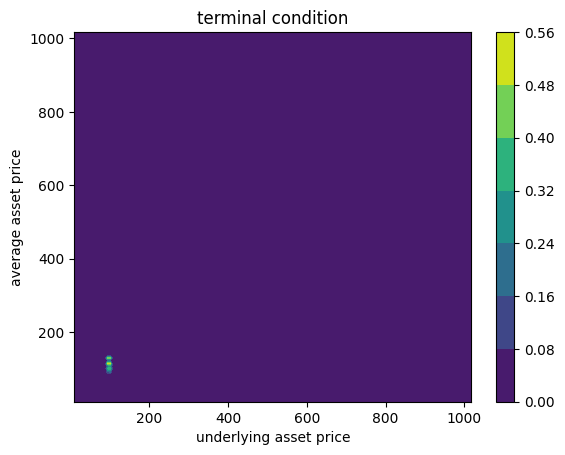

iteration 4


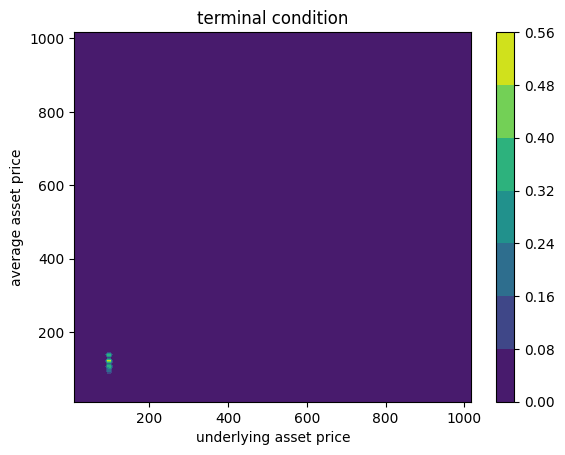

iteration 5


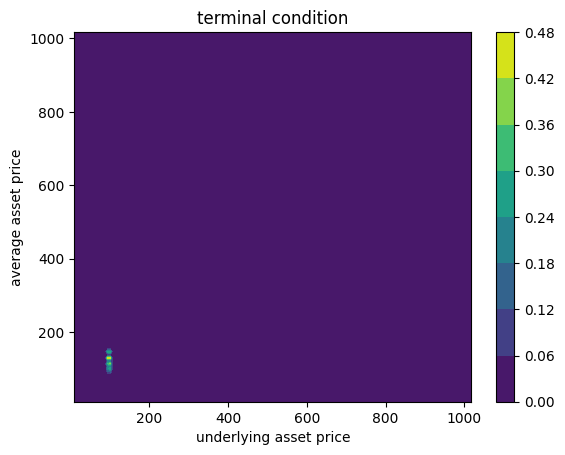

iteration 6


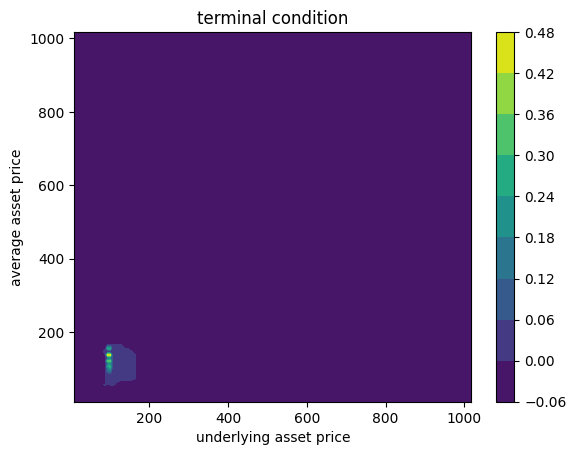

iteration 7


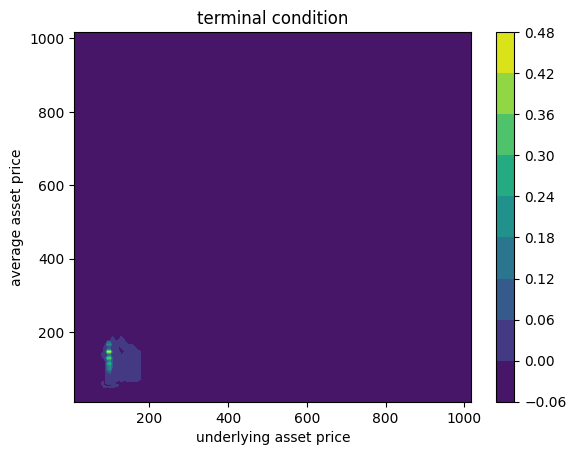

iteration 8


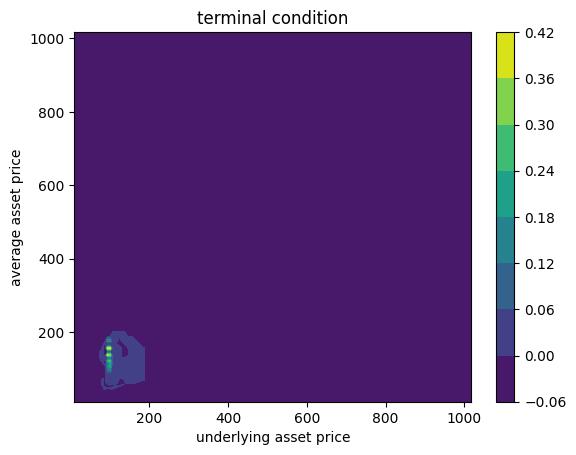

iteration 9


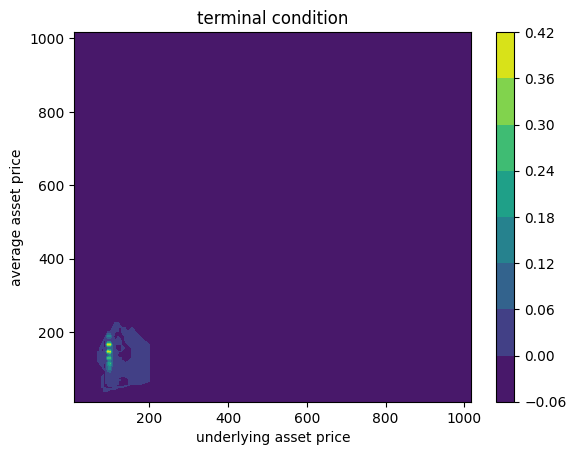

iteration 10


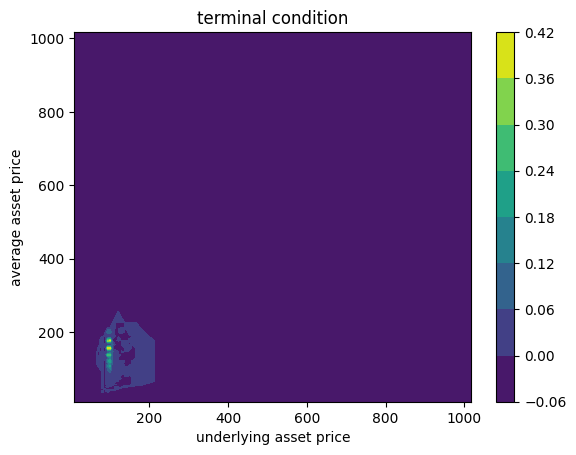

iteration 11


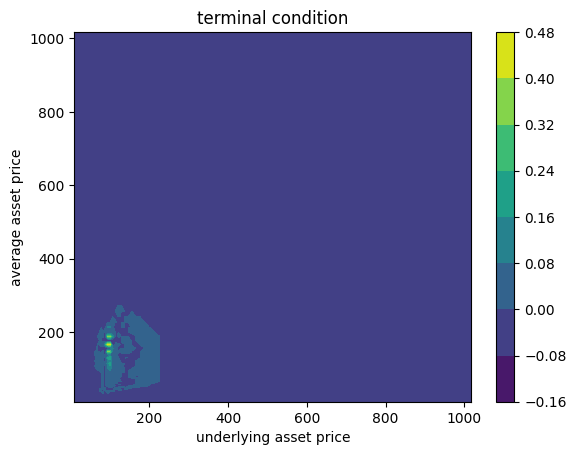

iteration 12


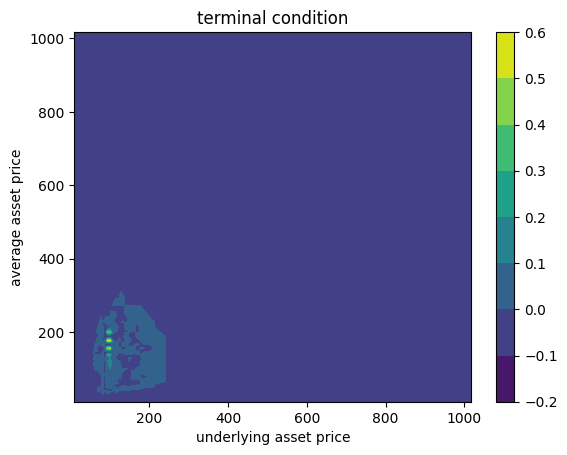

iteration 13


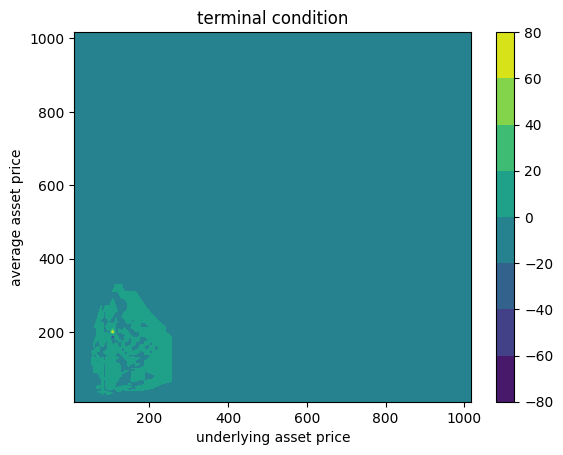

iteration 14


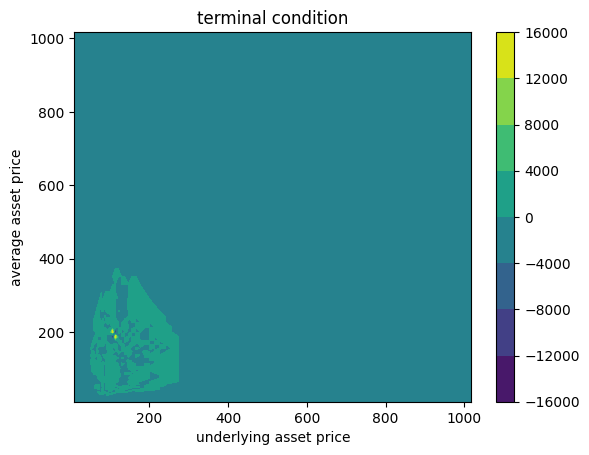

iteration 15


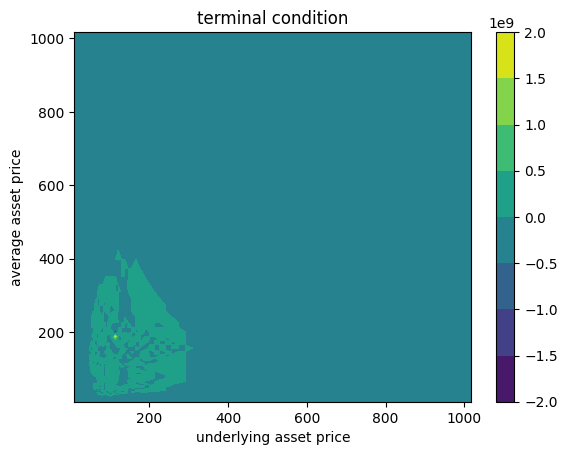

iteration 16


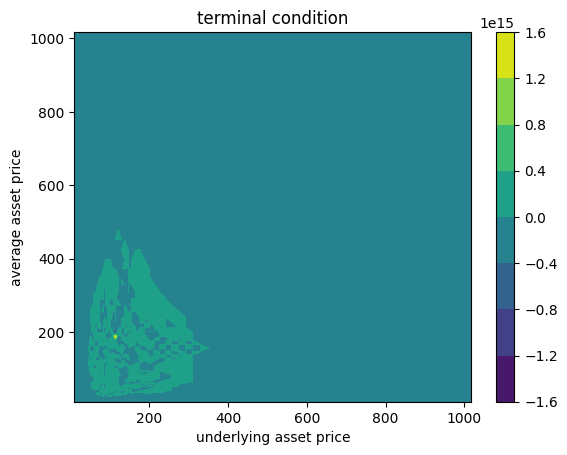

iteration 17


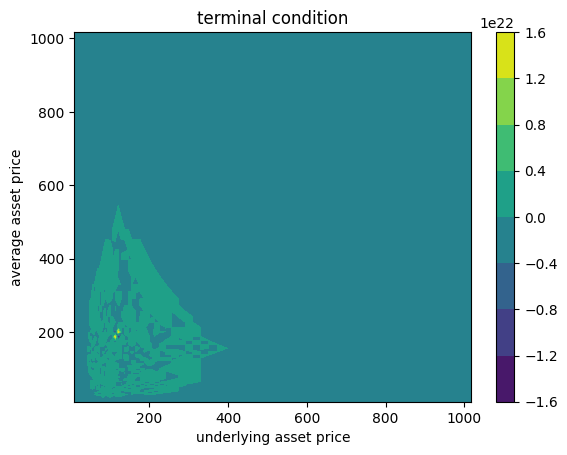

iteration 18


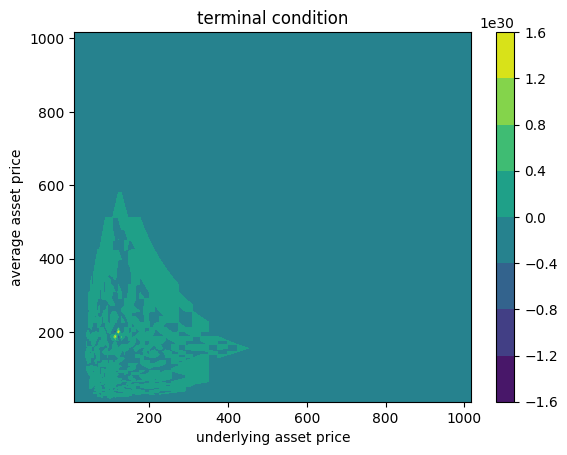

iteration 19


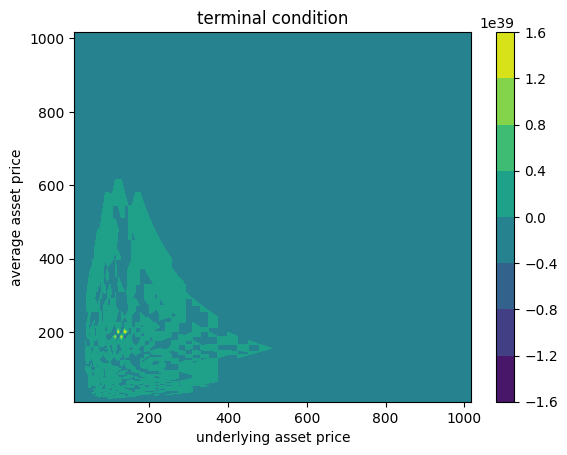

In [11]:
history = [simulation.solver.advectee.get()]
fig, ax = pyplot.subplots()
CS = ax.contourf(simulation.S_mesh, simulation.A_mesh, simulation.solver.advectee.get())
fig.colorbar(CS, ax=ax)
ax.set_title("terminal condition")
ax.set_xlabel("underlying asset price")
ax.set_ylabel("average asset price")
pyplot.show()
for i in range(20):
    print(f"iteration {i}")
    res = simulation.run(n_iters=2)
    fig, ax = pyplot.subplots()
    CS = ax.contourf(simulation.S_mesh, simulation.A_mesh, simulation.solver.advectee.get())
    fig.colorbar(CS, ax=ax)
    ax.set_title("terminal condition")
    ax.set_xlabel("underlying asset price")
    ax.set_ylabel("average asset price")
    pyplot.show()
    history.append(res)

In [12]:
from matplotlib.colors import LightSource
from matplotlib import cm
import matplotlib.pyplot as plt

In [13]:
def show_func(frame):
    fig, axs = plt.subplots(1, 1, subplot_kw={"projection": "3d"}, figsize=(15, 5))
    state = history[frame]
    x = np.arange(state.shape[1])
    y = np.arange(state.shape[0])
    x, y = np.meshgrid(x, y)
    z = state

    # Lighting setup
    ls = LightSource(270, 45)
    rgb = ls.shade(z, cmap=cm.coolwarm, vert_exag=0.1, blend_mode="soft")

    axs.plot_surface(
        x, y, z, rstride=1, cstride=1, facecolors=rgb, linewidth=0, antialiased=False
    )
    axs.set_title(f"t={frame}")
    axs.set_xlabel("X-axis")
    axs.set_ylabel("Y-axis")
    axs.set_zlabel("Z-axis")

    return fig

In [14]:
def show_func2d(frame):
    #do a 2d plot of the initial condition using the meshgrid and contourplot
    fig, ax = pyplot.subplots()
    CS = ax.contourf(simulation.S_mesh, simulation.A_mesh, history[frame])
    fig.colorbar(CS, ax=ax)
    ax.set_title("terminal condition")
    ax.set_xlabel("underlying asset price")
    ax.set_ylabel("average asset price")
    # pyplot.show()
    return fig

In [15]:
# show_anim(show_func, range(10), duration=0.01, loop=0)


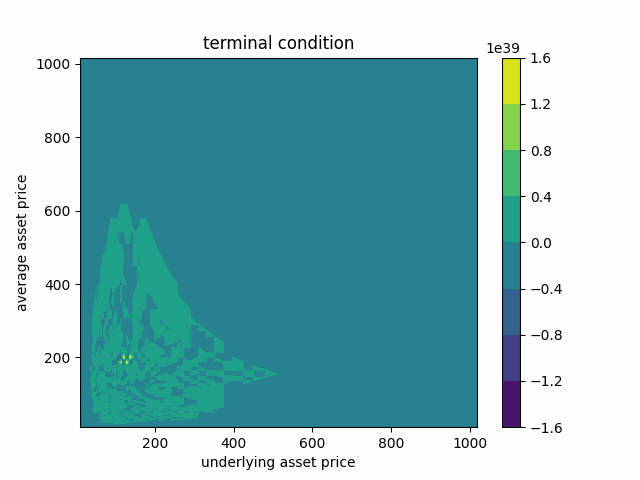

HTML(value="<a href='.\\tmpn49d7sdk.gif' target='_blank'>.\\tmpn49d7sdk.gif</a><br>")

In [16]:
show_anim(show_func2d, range(20), duration=0.01, loop=0)

In [9]:
sol_at_t_0 = simulation.run(n_iters=2)

i=0
i=1
i=2
i=3
i=4
i=5
i=6
i=7
i=8
i=9
i=10
i=11
i=12
i=13
i=14
i=15
i=16
i=17
i=18
i=19
i=20
i=21
i=22
i=23


C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:84: RuntimeWarning: overflow encountered in scalar multiply
  result = (np.abs(atv(*g_c, 0.5)) - atv(*g_c, +0.5) ** 2) * tmp
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:120: RuntimeWarning: overflow encountered in scalar multiply
  tmp *= 2 * (ats(*psi, 2) - ats(*psi, 1) - ats(*psi, 0) + ats(*psi, -1))
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:129: RuntimeWarning: invalid value encountered in scalar add
  result += tmp


i=24


C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:171: RuntimeWarning: overflow encountered in scalar multiply
  tmp *= 0.5 * ats(*psi, 1) + ats(*psi, 0)
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:92: RuntimeWarning: overflow encountered in scalar multiply
  0.5
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:144: RuntimeWarning: overflow encountered in scalar multiply
  tmp *= 2 * (
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:161: RuntimeWarning: invalid value encountered in scalar add
  result += tmp
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:84: RuntimeWarning: overflow encountered in scalar multiply
  result = (np.abs(atv(*g_c, 0.5)) - atv(*g_c, +0.5) ** 2) * tmp
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:116: RuntimeWarning: overflow encountered in scalar power
  - 2 * atv(*g_c, 0.5) ** 3 / g_bar**2
C:\Us

i=25


C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:171: RuntimeWarning: overflow encountered in scalar multiply
  tmp *= 0.5 * ats(*psi, 1) + ats(*psi, 0)
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:92: RuntimeWarning: overflow encountered in scalar multiply
  0.5
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:144: RuntimeWarning: overflow encountered in scalar multiply
  tmp *= 2 * (
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:161: RuntimeWarning: invalid value encountered in scalar add
  result += tmp
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:84: RuntimeWarning: overflow encountered in scalar power
  result = (np.abs(atv(*g_c, 0.5)) - atv(*g_c, +0.5) ** 2) * tmp
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:115: RuntimeWarning: overflow encountered in scalar multiply
  3 * atv(*g_c, 0.5) * np.abs(atv(*g_c, 0.5)

i=26


C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_nonoscillatory.py:325: RuntimeWarning: invalid value encountered in scalar add
  return (val_3 + np.abs(val_3)) / 2 * val_1 + (val_3 - np.abs(val_3)) / 2 * val_2
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_nonoscillatory.py:325: RuntimeWarning: invalid value encountered in scalar multiply
  return (val_3 + np.abs(val_3)) / 2 * val_1 + (val_3 - np.abs(val_3)) / 2 * val_2
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_nonoscillatory.py:325: RuntimeWarning: invalid value encountered in scalar subtract
  return (val_3 + np.abs(val_3)) / 2 * val_1 + (val_3 - np.abs(val_3)) / 2 * val_2


i=27


C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:171: RuntimeWarning: overflow encountered in scalar multiply
  tmp *= 0.5 * ats(*psi, 1) + ats(*psi, 0)
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:92: RuntimeWarning: overflow encountered in scalar multiply
  0.5
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:144: RuntimeWarning: overflow encountered in scalar multiply
  tmp *= 2 * (
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:161: RuntimeWarning: invalid value encountered in scalar add
  result += tmp
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:84: RuntimeWarning: overflow encountered in scalar multiply
  result = (np.abs(atv(*g_c, 0.5)) - atv(*g_c, +0.5) ** 2) * tmp
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:116: RuntimeWarning: overflow encountered in scalar power
  - 2 * atv(*g_c, 0.5) ** 3 / g_bar**2
C:\Us

i=28
i=29
i=30
i=31
i=32
i=33
i=34
i=35
i=36
i=37
i=38
i=39
i=40
i=41
i=42
i=43
i=44
i=45
i=46
i=47
i=48
i=49
i=50
i=51
i=52
i=53
i=54
i=55
i=56
i=57
i=58
i=59
i=60
i=61
i=62
i=63
i=64
i=65
i=66
i=67
i=68
i=69
i=70
i=71
i=72
i=73
i=74
i=75
i=76
i=77
i=78
i=79
i=80
i=81
i=82
i=83
i=84
i=85
i=86
i=87
i=88
i=89
i=90
i=91


In [10]:
sol_at_t_0

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 3.15282744e+14, -9.56476962e+13,  9.47124825e+13, ...,
         3.90353034e+02,  3.55171529e+02,  3.19420150e+02],
       [-3.92756549e+13, -1.37183650e+13, -5.57584168e+13, ...,
         2.92041685e+02,  2.48036128e+02,  2.06381584e+02],
       [ 3.37034944e+13, -3.90922428e+13,  1.77970765e+13, ...,
         1.19786792e+02,  9.48876978e+01,  7.33207691e+01]])

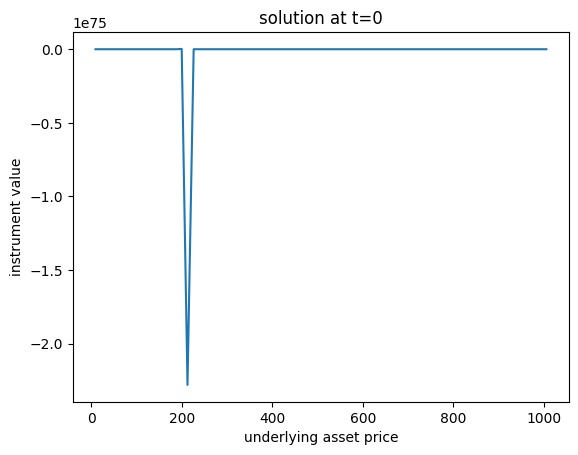

In [11]:
# plot line of the diagonal of the solution
fig, ax = pyplot.subplots()
ax.plot(simulation.S, sol_at_t_0.diagonal())
ax.set_title("solution at t=0")
ax.set_xlabel("underlying asset price")
ax.set_ylabel("instrument value")
pyplot.show()

In [11]:
# settings = Settings()
# simulation = Simulation(settings)
#
# S = simulation.S
# psi_T = simulation.solvers[2].advectee.get()
# #do a 2d plot of the initial condition using the meshgrid and contourplot
# fig, ax = pyplot.subplots()
# CS = ax.contourf(simulation.S_mesh, simulation.A_mesh, psi_T)
# fig.colorbar(CS, ax=ax)
# ax.set_title("Initial condition")
# ax.set_xlabel("average asset price")
# ax.set_ylabel("underlying asset price")
# pyplot.show()
#
#
#
# psi_0 = simulation.run(n_iters=2)
# # psi_a = settings.analytical_solution(S)
# print(f"{psi_0=}")